In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [42]:
# DATA
df1 = pd.read_csv('data_day.csv')
df2 = pd.read_csv('data_2018-08-05_2021-04-30.csv')
df3 = pd.read_csv('data_2018-05-05_2018-08-04.csv')
df4 = pd.read_csv('data_2015-08-09_2018-05-04.csv')
df5 = pd.read_csv('data_2013-02-12_2015-08-08.csv')
df6 = pd.read_csv('data_2010-05-19_to_2013-02-11.csv')
df7 = pd.read_csv('data_2007-08-23_to_2010-05-18.csv')
df8 = pd.read_csv('data_2004-11-26_to_2007-08-22.csv')
df = pd.concat([df6, df5, df4, df3, df2, df1])
df.index = range(0,4996)
df.tail()

date_time = pd.concat([pd.to_datetime(df['datetime'][0:4000]),pd.to_datetime(df['datetime'][4000:])])
df['ds'] = date_time
 

In [99]:
df['y'] = df['temp']

In [100]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'ds', 'y'],
      dtype='object')

In [101]:
data_used = df[['temp','tempmax', 'tempmin','humidity', 'precip','precipprob', 'windspeed', 'solarradiation', 'solarenergy','y','ds']]
columns_for_humidity = ['temp','tempmax', 'tempmin', 'precip','precipprob', 'windspeed', 'solarradiation', 'solarenergy']
columns_for_temp = ['humidity', 'precip','precipprob', 'windspeed', 'solarradiation', 'solarenergy']
data_used.columns

Index(['temp', 'tempmax', 'tempmin', 'humidity', 'precip', 'precipprob',
       'windspeed', 'solarradiation', 'solarenergy', 'y', 'ds'],
      dtype='object')

In [102]:
train_size = int(len(data_used) * 0.8)
train, test = data_used[:train_size], data_used[train_size:]

In [103]:
model_temp = Prophet()
for column in columns_for_temp:
    model_temp.add_regressor(column)
model_temp.fit(train)

15:05:46 - cmdstanpy - INFO - Chain [1] start processing
15:05:46 - cmdstanpy - INFO - Chain [1] done processing


In [104]:
future = model_temp.make_future_dataframe(periods=len(test))
future = future[future['ds'] > model_temp.history_dates.max()]  # keep only future dates

for column in columns_for_temp:
    future[column] = test[column]

print(future)

             ds  humidity  precip  precipprob  windspeed  solarradiation  \
3996 2021-04-27      82.0   0.600         100       11.2           148.8   
3997 2021-04-28      85.6   5.856         100       20.5           205.6   
3998 2021-04-29      69.8   0.626         100       14.8           161.1   
3999 2021-04-30      75.5   1.500         100       20.5           256.3   
4000 2021-05-01      84.2   0.146         100       14.8           172.8   
...         ...       ...     ...         ...        ...             ...   
4991 2024-01-17      93.8   8.794         100       17.5           148.7   
4992 2024-01-18      84.5   0.683         100       19.4           140.8   
4993 2024-01-19      85.5   0.072         100       20.3           131.9   
4994 2024-01-20      82.4   3.300         100       20.5            63.7   
4995 2024-01-21      91.4   3.400         100       22.3            15.8   

      solarenergy  
3996         12.9  
3997         17.8  
3998         13.9  
3999   

6.368523099963554
2.0538294114586355


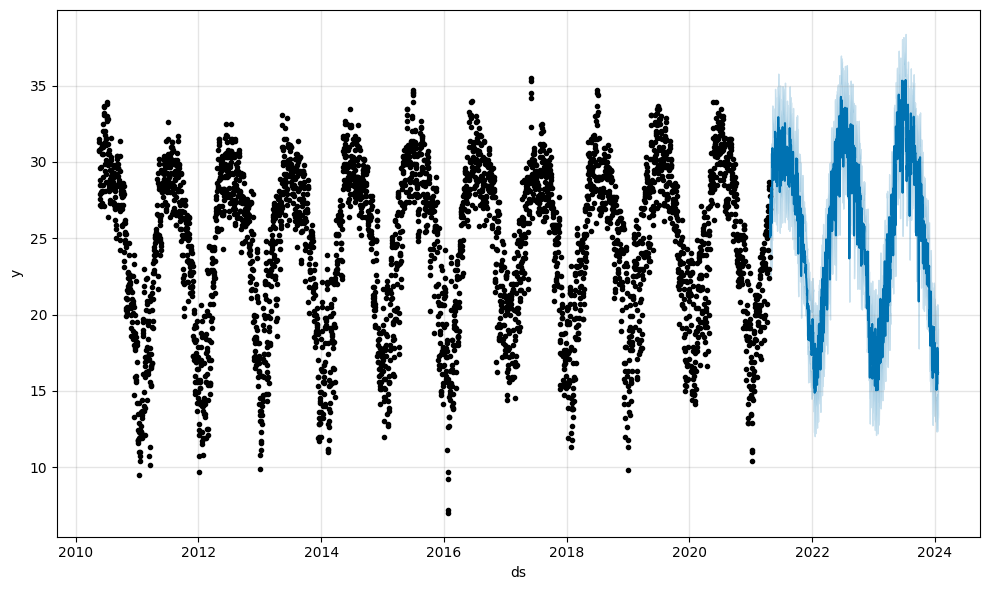

In [107]:
forecast = model_temp.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

print(mean_squared_error(test['y'], forecast['yhat']))
print(mean_absolute_error(test['y'], forecast['yhat']))
fig1 = model_temp.plot(forecast)



In [96]:
model_humidity = Prophet()
for column in columns_for_humidity:
    model_humidity.add_regressor(column)
model_humidity.fit(train)

14:57:46 - cmdstanpy - INFO - Chain [1] start processing
14:57:47 - cmdstanpy - INFO - Chain [1] done processing


In [97]:
future = model_humidity.make_future_dataframe(periods=len(test))
future = future[future['ds'] > model_humidity.history_dates.max()]  # keep only future dates

for column in columns_for_humidity:
    future[column] = test[column]

print(future)

             ds  temp  tempmax  tempmin  precip  precipprob  windspeed  \
3996 2021-04-27  24.2     27.2     21.0   0.600         100       11.2   
3997 2021-04-28  23.1     25.8     21.7   5.856         100       20.5   
3998 2021-04-29  24.1     28.6     20.0   0.626         100       14.8   
3999 2021-04-30  25.3     30.0     21.0   1.500         100       20.5   
4000 2021-05-01  25.5     29.0     23.0   0.146         100       14.8   
...         ...   ...      ...      ...     ...         ...        ...   
4991 2024-01-17  20.5     22.0     19.5   8.794         100       17.5   
4992 2024-01-18  22.4     26.5     20.0   0.683         100       19.4   
4993 2024-01-19  22.6     26.6     20.0   0.072         100       20.3   
4994 2024-01-20  23.0     26.0     19.0   3.300         100       20.5   
4995 2024-01-21  16.0     18.0     14.0   3.400         100       22.3   

      solarradiation  solarenergy  
3996           148.8         12.9  
3997           205.6         17.8  
399

125.99682115824615
9.715379142758062


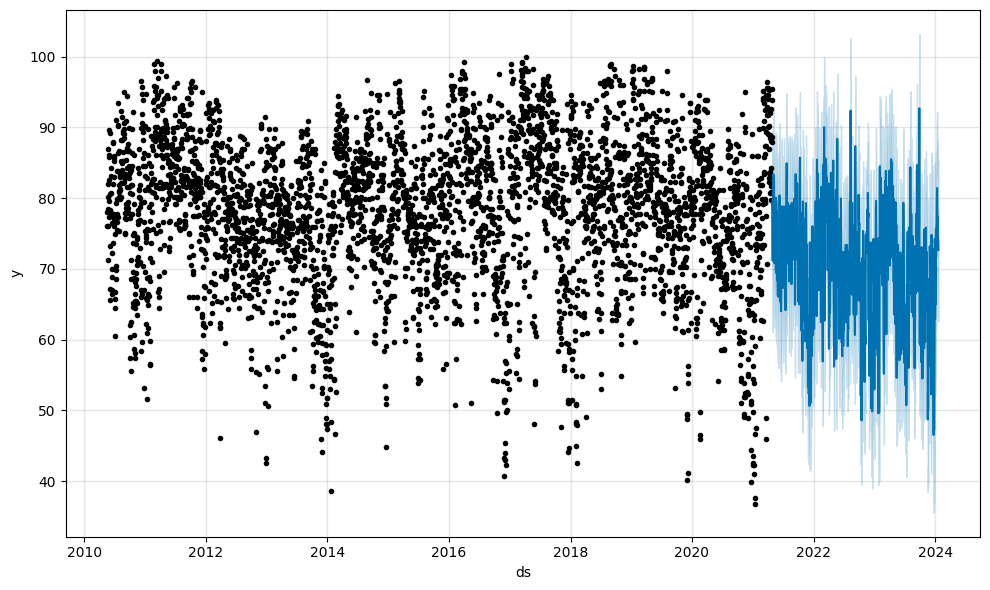

In [98]:
forecast = model_humidity.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

print(mean_squared_error(test['y'], forecast['yhat']))
print(mean_absolute_error(test['y'], forecast['yhat']))
fig1 = model_humidity.plot(forecast)
